In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'png'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2NoZXJ5bGtvdWFkaW8vRG9jdW1lbnRzL1JlcG9zaXRvcmllcy9wZXJzb25hbC13ZWJzaXRlLzNBL0FwcHJlbnRpc2FnZS1zdGF0'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/var/folders/4g/2x7xwt6106l13nxqljfks4gm0000gn/T/ipykernel_31854/14405785.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap.py": 1731323902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap_external.py": 1731323902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/codecs.py": 1731323889.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/aliases.py": 1731323904.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/cp437.py": 1731323905.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/__init__.py": 1731323904.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/utf_8.py": 1731323906.0, "/Library/Developer/CommandLineT

In [2]:
#Q1 : Function that generates data from a linear model
import numpy as np

def generate_data(X, theta, sigma_squared) :
    n = X.shape[0] # Extract the length of data sample
    noise = np.random.normal(loc=0,scale=np.sqrt(sigma_squared),size=n) # generate the error term /!\ scale = sd
    y = X.dot(theta) + noise # Y = X+theta + noise
    return y

In [3]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt


theta = [10,1,5,2,8,0,0,0,0,0] # Define the true theta
lambda_grid = np.logspace(-2, 4, 50) # Define the grid of lambda values
n, d = 100, 10 # Dimension of dataset
X = np.random.normal(loc=0, scale=1, size=(n, d)) #features

In [4]:
n_sim=1000
estimated_theta = np.zeros((n_sim,d)) #store the estimated theta for each simulation
bias_squared = np.zeros((len(lambda_grid),d)) #store the squared bias for each lambda
variance = np.zeros((len(lambda_grid),d)) #store the variance for each lambda

# Iterate over lambda values
for idx,alpha in enumerate(lambda_grid):
    for i in range(n_sim): #start simulation
        y = generate_data(X, theta, 1)
        fit = Ridge(alpha=alpha,fit_intercept=False).fit(X,y) #we do not want the model to fit an intercept
        estimated_theta[i,:]= fit.coef_
    bias_squared[idx,:]=(np.mean(estimated_theta,axis=0)-theta)**2
    variance[idx,:] = np.std(estimated_theta,axis=0)**2

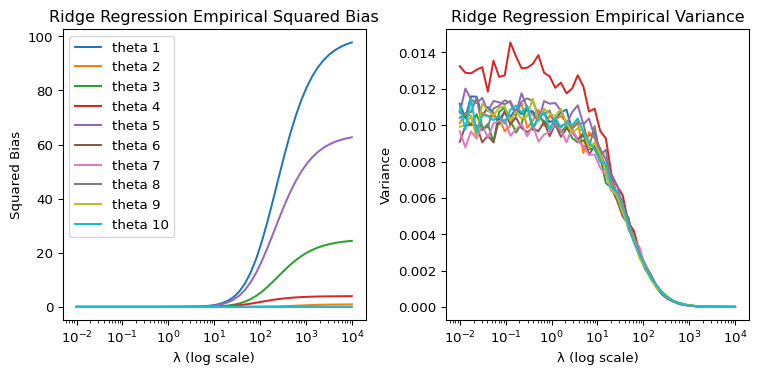

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

for i in range(d):
    axes[0].plot(lambda_grid, bias_squared[:, i], label=f'theta {i+1}')
axes[0].set_xscale('log')
axes[0].set_xlabel('λ (log scale)')
axes[0].set_ylabel('Squared Bias')
axes[0].set_title('Ridge Regression Empirical Squared Bias')
axes[0].legend(loc='best')

# Plot variance on the second subplot
for i in range(d):
    axes[1].plot(lambda_grid, variance[:, i], label=f'theta {i+1}')
axes[1].set_xscale('log')
axes[1].set_xlabel('λ (log scale)')
axes[1].set_ylabel('Variance')
axes[1].set_title('Ridge Regression Empirical Variance')

# Show the plots
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Ridge Regression Empirical Variance')

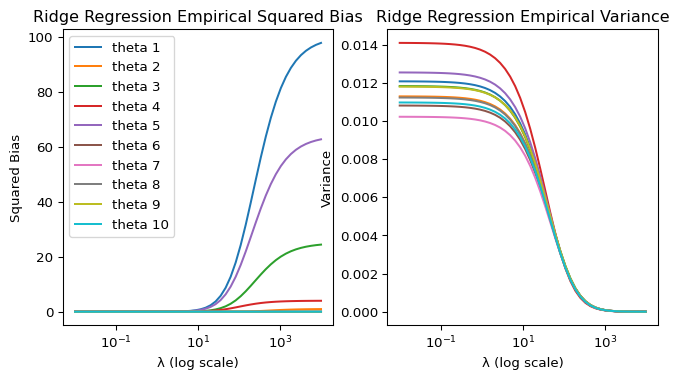

In [6]:
#Plot squared theorical bias : −λ(X^T X + λId) (−1) θ
bias_theoretical = np.zeros((len(lambda_grid), d))
variance_theorical = np.zeros((len(lambda_grid), d))

for idx, alpha in enumerate(lambda_grid):
    bias_theoretical[idx, :] = (-alpha * np.linalg.inv(X.T @ X + alpha * np.eye(d)) @ theta)**2
    variance_theorical[idx,:] = np.diag((1 * np.linalg.inv(alpha * np.eye(d) + X.T @ X)**2 @ (X.T @ X)))
    
fig,axes = plt.subplots(1,2,figsize=(8,4))

for i in range(d):
    axes[0].plot(lambda_grid, bias_theoretical[:, i], label=f'theta {i+1}')
axes[0].set_xscale('log')
axes[0].set_xlabel('λ (log scale)')
axes[0].set_ylabel('Squared Bias')
axes[0].set_title('Ridge Regression Empirical Squared Bias')
axes[0].legend(loc='best')

# Plot variance on the second subplot
for i in range(d):
    axes[1].plot(lambda_grid, variance_theorical[:, i], label=f'theta {i+1}')
axes[1].set_xscale('log')
axes[1].set_xlabel('λ (log scale)')
axes[1].set_ylabel('Variance')
axes[1].set_title('Ridge Regression Empirical Variance')

In [7]:
from sklearn.linear_model import Lasso

lasso_bias_squared = np.zeros((len(lambda_grid), d))
variance_lasso = np.zeros((len(lambda_grid), d))
estimated_theta_lasso = np.zeros((n_sim, d))

# Iterate over lambda values
for idx, alpha in enumerate(lambda_grid):
        for i in range(n_sim) :
            y = generate_data(X, theta, 1)
            fit = Lasso(alpha=alpha,fit_intercept=False).fit(X,y)
            estimated_theta_lasso[i,:]= fit.coef_
        lasso_bias_squared[idx, :] = (np.mean(estimated_theta_lasso,axis=0)- theta) ** 2
        variance_lasso[idx, :] = np.std(estimated_theta_lasso, axis=0) ** 2

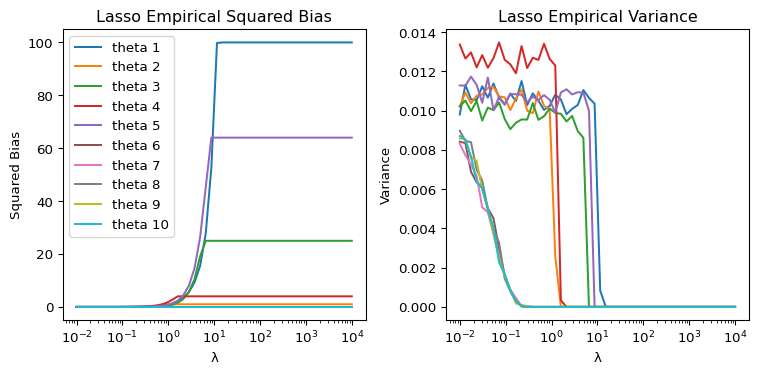

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

for i in range(d):
    axes[0].plot(lambda_grid, lasso_bias_squared[:, i],label=f'theta {i+1}')

axes[0].set_xscale('log')
axes[0].set_xlabel('λ')
axes[0].set_ylabel('Squared Bias')
axes[0].set_title('Lasso Empirical Squared Bias')
axes[0].legend(loc='best')

for i in range(d):
    axes[1].plot(lambda_grid, variance_lasso[:, i],label=f'theta {i+1}')

axes[1].set_xscale('log')
axes[1].set_xlabel('λ')
axes[1].set_ylabel('Variance')
axes[1].set_title('Lasso Empirical Variance')
plt.tight_layout()
plt.show()

In [9]:
import warnings 
warnings.filterwarnings('ignore')

In [10]:
#read data from csv file
import pandas as pd
data = pd.read_csv("data_dm3.csv", sep=",", header=None)

# renommer les 210 premiers colonnes en X1, X2, ..., X210 et la dernière colonne en Y
data.columns = [f'X{i}' for i in range(1, 211)] + ['Y']
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X202,X203,X204,X205,X206,X207,X208,X209,X210,Y
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0


In [11]:
# split dataset to train and test
from sklearn.model_selection import train_test_split

X = data.drop(columns='Y')
y = data['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#test if the splitting is effective
n=X.shape[0]
print(f'Train size (proportion) : {X_train.shape[0]/n : .2f} \nTest size (proportion) : {X_test.shape[0]/n : .2f}')

Train size (proportion) :  0.80 
Test size (proportion) :  0.20


In [12]:
from sklearn.linear_model import RidgeCV

lambda_grid = np.logspace(-2, 4, 50)
ridge_cv = RidgeCV(alphas=lambda_grid,fit_intercept=True).fit(X_train, y_train) #to perform cross validation

In [13]:
# plot the coefficients as a function of lambda
coefs = []
for a in lambda_grid:
    ridge = Ridge(alpha=a, fit_intercept=True).fit(X, y)
    coefs.append(ridge.coef_)

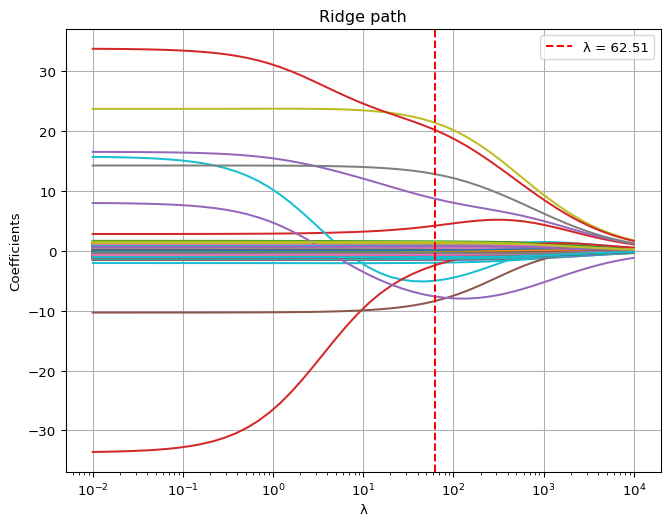

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(lambda_grid, coefs)
plt.xscale('log')
plt.xlabel('λ')
plt.ylabel('Coefficients')
plt.axvline(x=ridge_cv.alpha_, color='r', linestyle='--', label=f'λ = {ridge_cv.alpha_:.2f}')
plt.title("Ridge path")
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [15]:
print(f'Intercept value : {ridge_cv.intercept_}')

Intercept value : 152.28937186306018


In [16]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=lambda_grid,fit_intercept=True).fit(X_train, y_train)

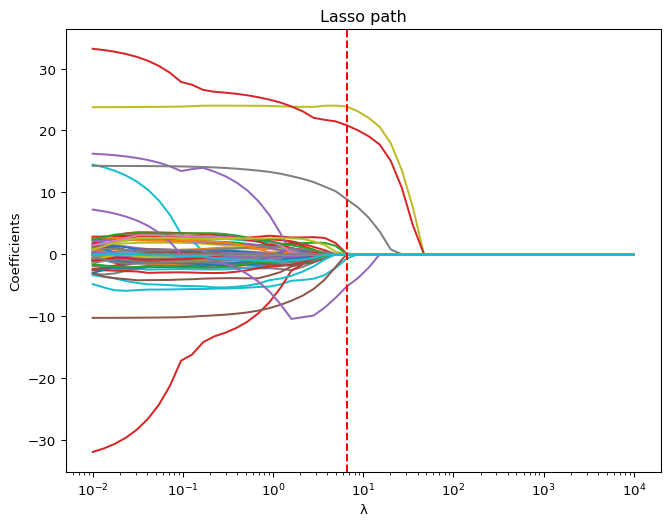

In [17]:
#LASSO PATH
coefs_lasso = []
for a in lambda_grid:
    lasso = Lasso(alpha=a, fit_intercept=True)
    lasso.fit(X, y)
    coefs_lasso.append(lasso.coef_)

plt.figure(figsize=(8, 6))
plt.plot(lambda_grid, coefs_lasso)
plt.xscale('log')
plt.xlabel('λ')
plt.ylabel('Coefficients')
plt.title("Lasso path")
plt.axvline(x=lasso_cv.alpha_, color='r', linestyle='--', label=f'λ = {lasso_cv.alpha_:.2f}')
plt.show()

In [18]:
# check value of intercept
print(f'Intercept value : {lasso_cv.intercept_}')

Intercept value : 151.95282341561403


In [19]:
from sklearn.metrics import mean_squared_error

y_pred_lasso = lasso_cv.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error for Lasso: {mse_lasso:.2f}')

y_pred_ridge = ridge_cv.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error for Ridge: {mse_ridge:.2f}')

Mean Squared Error for Lasso: 2869.43
Mean Squared Error for Ridge: 2923.54
